In [249]:
#Required libraires for the project
import os
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import re
text_list=[]
label_list=[]
df = pd.DataFrame(columns=['Text','Label'])
count=0
spam_count=0
non_spam_count=0
for root, dirs, files in os.walk("/Users/prashanthimallijula/Documents/EECS738/project3/proj3/"):
        #print(root)
        for  root, dirs, files in os.walk(root):
            for file in files:
                #if (count > 0):
                    f = open(root+"/"+file, "r",encoding='latin-1', errors='ignore')
                    text= f.read()
                    if (file[0:4]=="spms"):
                        lable= "spam"
                        spam_count=spam_count+1
                    else:
                        lable= "not_spam"
                        non_spam_count=non_spam_count+1
                    f.close()
                    text_list.append(text[8:])
                    label_list.append(lable)

            #count=count+1
df['Text']=text_list
df['Label']=label_list

In [250]:
df['Text'] = [entry.lower() for entry in df['Text']]

In [251]:
ind_list=[]
ind_count=0
for i in df['Text']:
    ind_count=ind_count+1
    ind_list.append(ind_count)
df['Ind']= ind_list

In [252]:
df.head()

,Text,Label,Ind
0,here\n\nuniversity degree programs increase p...,spam,1
1,bisfai deadline extension !\n\nbisfai deadlin...,not_spam,2
2,"incredible opportunity\n\ndear friend , recei...",spam,3
3,""" life without debt ""\n\npardon intrusion . o...",spam,4
4,"query :\n\ndear linguist , work double negati...",not_spam,5


In [253]:
df.set_index('Ind', inplace=True)

In [254]:
spam_count=0
non_spam_count=0
for i in df['Label']:
    if (i== str('not_spam')):
        non_spam_count=non_spam_count+1
    if (i== str('spam')):
        spam_count= spam_count+1
        
print('non_spam_count', non_spam_count)
print('spam_count',spam_count)

non_spam_count 468
spam_count 481


In [255]:
df.shape

(949, 2)

In [256]:
df['Label'].unique()

array(['spam', 'not_spam'], dtype=object)

In [257]:
df.describe(exclude=[np.number])

,Text,Label
count,949,949
unique,934,2
top,re :\n\n= 20 virtual girlfriend virtual boyfr...,spam
freq,4,481


In [258]:
from nltk import word_tokenize
df['Text'].dropna(inplace=True)
df['tokenized_text'] =df['Text'].apply(word_tokenize)

In [259]:
#Remove speacial characters
#Check stop words and special characters
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
#special=['!','@','#','$','%','^','&','*','(',')',':','<','>',',','.',';','{','}','|','_','-','+','=','`','~',"--","'",'"','[',']','\n','/','\\']
special=[',','.',';','_','-','=','*']
for item  in df['tokenized_text']:
    item_new=[]
    for word in item:
        word=str(word)
        if (word in stop_words) or (word in special):
            item.remove(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prashanthimallijula/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [260]:
#Remove speacial characters
#Check stop words and special characters
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
#special=['!','@','#','$','%','^','&','*','(',')',':','<','>',',','.',';','{','}','|','_','-','+','=','`','~',"--","'",'"','[',']','\n','/','\\']
special=[',','.',';','_','-','=','*']
for item  in df['tokenized_text']:
    item_new=[]
    for word in item:
        word=str(word)
        if (word in stop_words) or (word in special):
            item.remove(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prashanthimallijula/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [261]:
#Remove speacial characters
#Check stop words and special characters
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
#special=['!','@','#','$','%','^','&','*','(',')',':','<','>',',','.',';','{','}','|','_','-','+','=','`','~',"--","'",'"','[',']','\n','/','\\']
special=[',','.',';','_','-','=','*']
for item  in df['tokenized_text']:
    item_new=[]
    for word in item:
        word=str(word)
        if (word in stop_words) or (word in special):
            item.remove(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prashanthimallijula/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [262]:
df.head()

,Text,Label,tokenized_text
Ind,,,
1,here\n\nuniversity degree programs increase p...,spam,"[university, degree, programs, increase, perso..."
2,bisfai deadline extension !\n\nbisfai deadlin...,not_spam,"[bisfai, deadline, extension, !, bisfai, deadl..."
3,"incredible opportunity\n\ndear friend , recei...",spam,"[incredible, opportunity, dear, friend, receiv..."
4,""" life without debt ""\n\npardon intrusion . o...",spam,"[``, life, without, debt, ``, pardon, intrusio..."
5,"query :\n\ndear linguist , work double negati...",not_spam,"[query, :, dear, linguist, work, double, negat..."


In [263]:
#Get uniques words in the data that is unique words in our case
unique_words=[]
temp_list=[]
for item in df['tokenized_text']:
    for word in item:
        temp_list.append(word)
temp_list1 = temp_list
temp_list =set(temp_list)
unique_words=temp_list

In [264]:
word_occurance={}
for word in temp_list1:
        if word in word_occurance:
            word_occurance[word] += 1
        else:
            word_occurance[word] = 1

In [265]:
new_word_occurance={}
for k,v in word_occurance.items():
        if v>=4:
             new_word_occurance[k]=v

In [266]:
is_spam = df['Label']=='spam'
spam_df=df[is_spam]
spam_df.head()

,Text,Label,tokenized_text
Ind,,,
1,here\n\nuniversity degree programs increase p...,spam,"[university, degree, programs, increase, perso..."
3,"incredible opportunity\n\ndear friend , recei...",spam,"[incredible, opportunity, dear, friend, receiv..."
4,""" life without debt ""\n\npardon intrusion . o...",spam,"[``, life, without, debt, ``, pardon, intrusio..."
6,want best economical hunt vacation life ?\n\n...,spam,"[want, best, economical, hunt, vacation, life,..."
8,"market million , try free\n\nmessage comply p...",spam,"[market, million, try, free, message, comply, ..."


In [267]:
is_not_spam = df['Label']=='not_spam'
not_spam_df=df[is_not_spam]
not_spam_df.head()

,Text,Label,tokenized_text
Ind,,,
2,bisfai deadline extension !\n\nbisfai deadlin...,not_spam,"[bisfai, deadline, extension, !, bisfai, deadl..."
5,"query :\n\ndear linguist , work double negati...",not_spam,"[query, :, dear, linguist, work, double, negat..."
7,"\n\nlang classification grime , joseph e . ba...",not_spam,"[lang, classification, grime, joseph, e, barba..."
9,8th international conference functional gramm...,not_spam,"[8th, international, conference, functional, g..."
11,query : letter frequency text identification\...,not_spam,"[query, :, letter, frequency, text, identifica..."


In [268]:
word_and_spam={}
temp_list2=[]
for item in spam_df['tokenized_text']:
    for word in item:
        temp_list2.append(word)

for word in temp_list2:
        if word in word_and_spam:
            word_and_spam[word] += 1
        else:
            word_and_spam[word] = 1
            
new_word_and_spam={}
for k,v in  word_and_spam.items():
        if v>=4:
              new_word_and_spam[k]=v

In [269]:
word_and_non_spam={}
temp_list3=[]
for item in not_spam_df['tokenized_text']:
    for word in item:
        temp_list3.append(word)

for word in temp_list3:
        if word in word_and_non_spam:
            word_and_non_spam[word] += 1
        else:
            word_and_non_spam[word] = 1
            
new_word_and_non_spam={}
for k,v in  word_and_non_spam.items():
        if v>=4:
              new_word_and_non_spam[k]=v

In [270]:
print('non_spam_count', non_spam_count)
print('spam_count',spam_count)

non_spam_count 468
spam_count 481


In [271]:
import math
non_occurance_spam_prob_yes=0.0
non_occurance_spam_prob_no=0.0
occurance_spam_prob_yes=0.0
occurance_spam_prob_no=0.0
IG={}
for k,v in new_word_occurance.items():
    #req
    non_occurance_prob= ((len(new_word_occurance)-v)/len(new_word_occurance))
    if (k in word_and_spam):
        non_occurance_spam_yes= (len(word_and_spam)-word_and_spam[k])/(len(word_and_spam))
        #req
        print(k)
        print(non_occurance_spam_yes)
        non_occurance_spam_prob_yes=math.log2(non_occurance_spam_yes)   
    if (k in word_and_non_spam):
        non_occurance_spam_no= (len(word_and_non_spam)-word_and_non_spam[k])/(len(word_and_spam))
        #req
        non_occurance_spam_prob_no= math.log2(non_occurance_spam_no)
        #req
    occurance_prob= (v/len(new_word_occurance))
    if (k in word_and_spam):
        occurance_spam_yes= (word_and_spam[k]/spam_count)
        #req
        occurance_spam_prob_yes= math.log2(occurance_spam_yes)
    if (k in word_and_non_spam):
        occurance_spam_no=(word_and_non_spam[k]/len(word_and_non_spam))
        #req
        occurance_spam_prob_no=math.log2(occurance_spam_no)
   
    IG[k] = ((non_occurance_prob*(non_occurance_spam_prob_yes+non_occurance_spam_prob_no))
                 +(occurance_prob*(occurance_spam_prob_yes+occurance_spam_prob_no)))

university
0.9963846710050615
degree
0.9957519884309473
programs
0.9963846710050615
increase
0.9933116413593637
personal
0.9886117136659436
prestige
0.9992769342010123
money
0.9210954446854663
earn
0.9859002169197397
power
0.995119305856833
advance
0.997469269703543
eminent
0.9992769342010123
non-accredit
0.9992769342010123
award
0.9982827187274042
$
0.5968908170643529
200
0.987527114967462
grant
0.9986442516268981
base
0.9918655097613883
present
0.9963846710050615
knowledge
0.9954808387563269
experience
0.9904193781634129
effort
0.9935827910339841
necessary
0.9967462039045553
part
0.9897866955892987
short
0.995119305856833
phone
0.9735177151120752
call
0.9591467823571945
require
0.9870751988430947
ba
0.9992769342010123
mba
0.9992769342010123
phd
0.9992769342010123
diploma
0.9990961677512654
field
0.9953000723065799
choice
0.996294287780188
detail
0.9922270426608821
extension
0.9988250180766449
!
0.3836767895878525
bar
0.9996384671005062
foundation
0.9995480838756327
artificial
0.99837

In [272]:
sorted_IG={}
sorted_IG = sorted(IG.items(), key=lambda kv: kv[1])
c=0
for k,v in reversed(sorted_IG):
         print(k,v)
         c=c+1
print('length :',c)

truman 0.8249585064238614
pump 0.8249585064238614
8080 0.8249585064238614
sensor 0.8249585064238614
patience 0.8249585064238614
converter 0.8249585064238614
incidentals 0.8249585064238614
watermania 0.8249585064238614
bulkmate 0.8249553438094015
daytrader 0.8249553438094015
pursuant 0.8249553438094015
bean 0.8249553438094015
superstar 0.8249553438094015
wembley 0.8249553438094015
pay-no 0.8249553438094015
low-cost 0.8249553438094015
cfm 0.8249553438094015
shoulder 0.8249550322981476
disease 0.8249550322981476
sexcatalog 0.8249550322981476
magical 0.8249459845770392
reverify 0.8249459845770392
schedule-then 0.8249459845770392
820 0.8249441444950154
410 0.8249441444950154
dateline 0.8249441444950154
limitless 0.8249441444950154
whiten 0.8249441444950154
constellation 0.8249441444950154
disappoint 0.8249441444950154
frontpage 0.8249441444950154
cst 0.8249441444950154
franchise 0.824923012448777
dolby 0.8249143026610558
therapy 0.8248892894059625
rip 0.8248892894059625
insane 0.82488928940

In [273]:
c=0
attri_dict={}
for k,v in reversed(sorted_IG):
    if c<=70:
        attri_dict[k]=v
        c=c+1
for k,v in attri_dict.items():
    print(k,v)

truman 0.8249585064238614
pump 0.8249585064238614
8080 0.8249585064238614
sensor 0.8249585064238614
patience 0.8249585064238614
converter 0.8249585064238614
incidentals 0.8249585064238614
watermania 0.8249585064238614
bulkmate 0.8249553438094015
daytrader 0.8249553438094015
pursuant 0.8249553438094015
bean 0.8249553438094015
superstar 0.8249553438094015
wembley 0.8249553438094015
pay-no 0.8249553438094015
low-cost 0.8249553438094015
cfm 0.8249553438094015
shoulder 0.8249550322981476
disease 0.8249550322981476
sexcatalog 0.8249550322981476
magical 0.8249459845770392
reverify 0.8249459845770392
schedule-then 0.8249459845770392
820 0.8249441444950154
410 0.8249441444950154
dateline 0.8249441444950154
limitless 0.8249441444950154
whiten 0.8249441444950154
constellation 0.8249441444950154
disappoint 0.8249441444950154
frontpage 0.8249441444950154
cst 0.8249441444950154
franchise 0.824923012448777
dolby 0.8249143026610558
therapy 0.8248892894059625
rip 0.8248892894059625
insane 0.82488928940

In [274]:
att_values=[]
for k, v in attri_dict.items():
    att_values=[]
    for item in df['tokenized_text']:
        if k in item:
            att_values.append(1)
        else:
            att_values.append(0)
    df[k]=att_values

In [275]:
df['truman'].unique()

array([0, 1])

In [276]:
#Overview of training data
print('Number of rows and columns in training data is - {}'.format(df.shape))
print()
print('Data types of training data is - {}'.format(df.dtypes))
print()
print('Training data Description  - {}'.format(df.describe()))
print()
print()
print('Training data Column names  - {}'.format(df.columns))
print()

#determine data type of columns and group  - Numeric/Non-Numeric
numerical = df.describe(include=[np.number])
print('Training data numeric columns are  - {}'.format(numerical))
print()

Number of rows and columns in training data is - (949, 74)

Data types of training data is - Text                object
Label               object
tokenized_text      object
truman               int64
pump                 int64
8080                 int64
sensor               int64
patience             int64
converter            int64
incidentals          int64
watermania           int64
bulkmate             int64
daytrader            int64
pursuant             int64
bean                 int64
superstar            int64
wembley              int64
pay-no               int64
low-cost             int64
cfm                  int64
shoulder             int64
disease              int64
sexcatalog           int64
magical              int64
reverify             int64
schedule-then        int64
820                  int64
410                  int64
dateline             int64
limitless            int64
                     ...  
disable              int64
prices               int64
013a            

In [277]:
df.head()

,Text,Label,tokenized_text,truman,pump,8080,sensor,patience,converter,incidentals,...,abrg,chase,consolidation,trusts,months,emin60,brought,gt,30067,marietta
Ind,,,,,,,,,,,,,,,,,,,,,
1,here\n\nuniversity degree programs increase p...,spam,"[university, degree, programs, increase, perso...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,bisfai deadline extension !\n\nbisfai deadlin...,not_spam,"[bisfai, deadline, extension, !, bisfai, deadl...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"incredible opportunity\n\ndear friend , recei...",spam,"[incredible, opportunity, dear, friend, receiv...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,""" life without debt ""\n\npardon intrusion . o...",spam,"[``, life, without, debt, ``, pardon, intrusio...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"query :\n\ndear linguist , work double negati...",not_spam,"[query, :, dear, linguist, work, double, negat...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [278]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(6)
import math

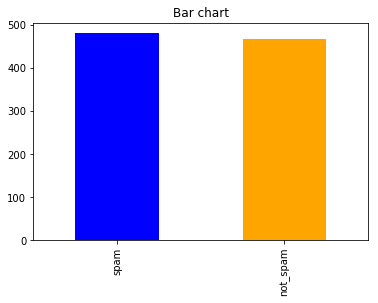

In [279]:
count_Class=pd.value_counts(df['Label'], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

In [280]:
df['Label'] = df['Label'].map( {'spam': 1, 'not_spam': -1} ).astype(int)

In [281]:
df['Label1'] = df['Label'].map( {1: 1, -1: 0} ).astype(int)
l= df['Label1'].tolist()
Y = np.array(l)

In [282]:
X =df[df.columns[3:]]
X=np.array(X)
X.shape

(949, 72)

In [283]:
np.sum(Y)

481

In [284]:
X[100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1])

In [285]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from cvxopt import matrix, solvers

In [286]:
def linear_kernel(x, y):
    x = np.array(x)
    y = np.array(y)
    return np.dot(x, y)
def poly_kernel(x, y, d = 4):
    x = np.array(x)
    y = np.array(y)
    return (np.dot(x, y) + 1) ** d

def rbf_kernel(x, y, sigma = 1):
    x = np.array(x)
    y = np.array(y)
    norm = np.linalg.norm(x - y)
    return np.exp(- (norm ** 2) / (sigma ** 2))

In [287]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from cvxopt import matrix, solvers
C=None
show_progress = False
Y_predict=[]
pred_col=[]
weight_opt_list=[]
b_list=[]
def compute_dot_product(X,kernel):
        n_samples, n_features = X.shape
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
             for j in range(n_samples):
                    if kernel=="linear_kernel":
                            K[i,j] = linear_kernel(X[i,:], X[j,:])
                    if kernel=="poly_kernel":
                            K[i,j] = poly_kernel(X[i,:], X[j,:])
                    if kernel=="rbf_kernel":
                            K[i,j] = rbf_kernel(X[i,:], X[j,:])
        return(K)
def compute_lagrange_multipliers(X,Y,K):
        # Setup solver inputs
        data_size = Y.shape[0]
        P = matrix(K, tc='d') # d means floats
        q = matrix(np.full(Y.shape, -1, dtype=float), tc='d')
        G = matrix(-np.identity(data_size), tc='d') if C is None \
            else matrix(np.concatenate((-np.identity(data_size), np.identity(data_size))), tc='d')
        b = matrix(np.zeros(1), tc='d')
        A = matrix(Y, tc='d').T
        h = matrix(np.zeros(data_size), tc='d') if C is None \
            else matrix(np.concatenate((np.zeros(data_size),C * np.ones(data_size))), tc='d')   
        solvers.options['show_progress'] = show_progress
        solution = solvers.qp(P, q, G, h, A, b)['x'] # Get oprtimal values
        return np.asarray(solution).reshape((data_size,)) # Convert matrix to numpy array
def compute_opt_weights(Lagrange_values,X,Y):
    weight_opt_list=[]
    for i in range(len(Lagrange_values)):
        sample_weight = Lagrange_values[i]*Y[i]*np.sum(X[i,:])
        weight_opt_list.append(sample_weight)
    return(weight_opt_list)
def compute_bias(Lagrange_values,Y):
    b_list=[]
    for i in range(Y.shape[0]):
        sample_b= Lagrange_values[i]*Y[i]
        b_list.append(sample_b)
    return(b_list)
#X:
#[X1...........X1i] [Yi]
#[x1,x2,x3.....xn][y1]
#[x1,x2,x3.....xn][y2]
#[x1,x2,x3.....xn][yn]
def svm_training(X,Y):
    Y_predict=[]    
    Lagrange_values=[]
    weight_opt_list=[]
    b_list=[]
    K= compute_dot_product(X,'linear_kernel')
    Lagrange_values= compute_lagrange_multipliers(X,Y,K)
    #print(len(Lagrange_values))
    weight_opt_list= compute_opt_weights(Lagrange_values,X,Y)
    #print(len(weight_opt_list))
    b_list= compute_bias(Lagrange_values,Y)
    #print(len(b_list))
    return (weight_opt_list,b_list)
#Pediction part
def svm_precit(weight_opt_list,X_Test, b_list):
    weight_opt_list=np.array(weight_opt_list)
    b_list=np.array(b_list)
    for i in range(len(X_Test)):
        pred = (weight_opt_list[i]*np.sum(X[i,:]))+(b_list[i])
        if pred > 0:
            Y_predict.append(1)
            pred_col.append('spam')
        if pred <= 0:
            Y_predict.append(-1)
            pred_col.append('not-spam') 
    return(Y_predict,pred_col)
weight_opt_list,b_list=svm_training(X,Y)
Y_predict,pred_col=svm_precit(weight_opt_list,X, b_list)
df['Y_predict'] =Y_predict
df['pred_col'] =pred_col

In [288]:
df.head()

,Text,Label,tokenized_text,truman,pump,8080,sensor,patience,converter,incidentals,...,trusts,months,emin60,brought,gt,30067,marietta,Label1,Y_predict,pred_col
Ind,,,,,,,,,,,,,,,,,,,,,
1,here\n\nuniversity degree programs increase p...,1,"[university, degree, programs, increase, perso...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-1,not-spam
2,bisfai deadline extension !\n\nbisfai deadlin...,-1,"[bisfai, deadline, extension, !, bisfai, deadl...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,not-spam
3,"incredible opportunity\n\ndear friend , recei...",1,"[incredible, opportunity, dear, friend, receiv...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-1,not-spam
4,""" life without debt ""\n\npardon intrusion . o...",1,"[``, life, without, debt, ``, pardon, intrusio...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-1,not-spam
5,"query :\n\ndear linguist , work double negati...",-1,"[query, :, dear, linguist, work, double, negat...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,not-spam


In [289]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
acc=accuracy_score(df['Label'].values, df['Y_predict'].values, normalize = True)
met=metrics.classification_report(df['Label'].values, df['Y_predict'].values)
conf=metrics.confusion_matrix(df['Label'].values, df['Y_predict'].values)
res=[]
res.append(str(acc))
res.append(str(met))
res.append(str(conf))

In [290]:
print("Accuracy:")
print(res[0])
print("\n")
print("Classification_report:")
print("\n")
print(res[1])
print("\n")
print("Confusion_Matrix:")
print("\n")
print(res[2])

Accuracy:
0.6354056902002108


Classification_report:


             precision    recall  f1-score   support

         -1       0.57      1.00      0.73       468
          1       1.00      0.28      0.44       481

avg / total       0.79      0.64      0.58       949



Confusion_Matrix:


[[468   0]
 [346 135]]
